In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carregar a base de dados CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
# Definir os nomes das classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
# Pré-processamento dos dados
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# Carregar a arquitetura do modelo VGG16 (sem incluir a camada densa superior)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
# Congelar as camadas convolucionais do modelo VGG16
for layer in vgg_model.layers:
    layer.trainable = False

In [9]:
# Criar um modelo sequencial e adicionar as camadas do modelo VGG16 seguido de camadas densas
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Treinar o modelo
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 22s 16ms/step - loss: 2.7413 - accuracy: 0.4472 - val_loss: 1.2271 - val_accuracy: 0.5810
Epoch 2/10
782/782 [==============================] - 11s 13ms/step - loss: 1.3142 - accuracy: 0.5471 - val_loss: 1.1159 - val_accuracy: 0.6171
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 1.1854 - accuracy: 0.5889 - val_loss: 1.0733 - val_accuracy: 0.6351
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 1.1192 - accuracy: 0.6123 - val_loss: 1.0454 - val_accuracy: 0.6469
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0790 - accuracy: 0.6251 - val_loss: 1.0248 - val_accuracy: 0.6561
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0495 - accuracy: 0.6362 - val_loss: 1.0350 - val_accuracy: 0.6497
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0259 - accuracy: 0.6456 - val_loss: 1.0187 - val_accuracy:

# Devido ao custo computacional foi usado apenas 10 epochs, possivelmente o valor da accuracy seria maior, com mais treinamento. 

In [12]:
# Avaliar o modelo
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)


313/313 [==============================] - 3s 7ms/step


Text(0.5, 1.0, 'Matriz de Confusão - CIFAR-10')

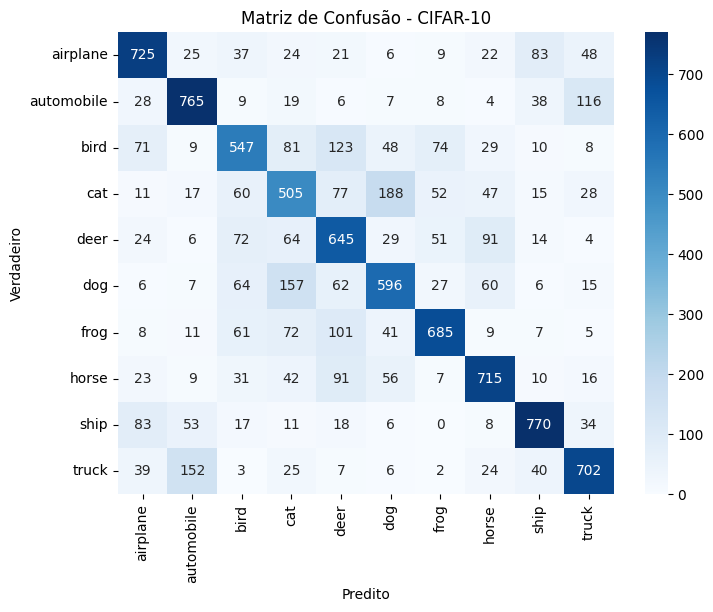

In [13]:
# Plotar a matriz de confusão 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - CIFAR-10')


Text(0.5, 1.0, 'Matriz de Confusão Normalizada - CIFAR-10')

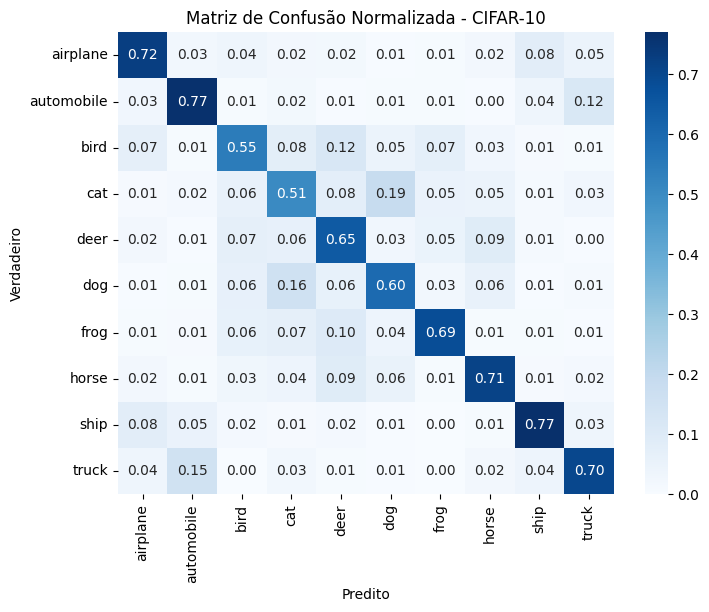

In [14]:
# Plotar a matriz de confusão normalizada
class_counts = np.sum(confusion_mtx, axis=1)
confusion_mtx_norm = confusion_mtx / class_counts[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_norm, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão Normalizada - CIFAR-10')

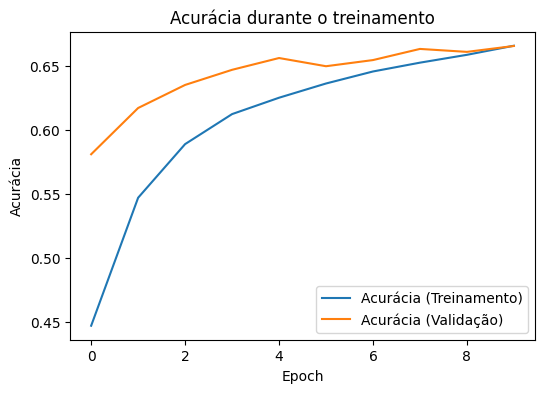

In [15]:
# Plotar gráfico de acurácia
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Acurácia (Treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (Validação)')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.legend()

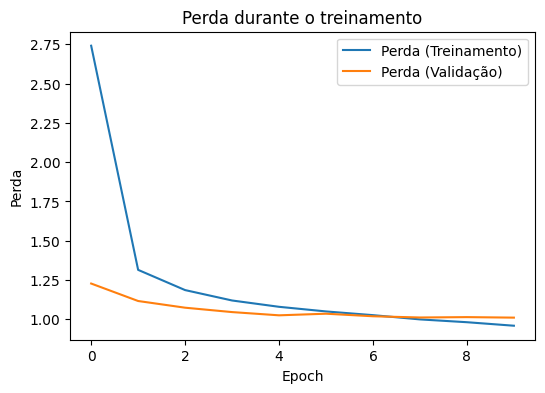

In [16]:
# Plotar gráfico de perda
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Perda (Treinamento)')
plt.plot(history.history['val_loss'], label='Perda (Validação)')
plt.title('Perda durante o treinamento')
plt.xlabel('Epoch')
plt.ylabel('Perda')
plt.legend()

plt.show()